In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import signal
import matplotlib.ticker as ticker
#import seaborn as sns; sns.set()

datas = ['mini_test', 'crop','euro', 'isic', 'chest']
datas_fg = ["cars", 'cub', "places", "plantae", 'tiered_test']
datas_full = ['miniIM test', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

In [ ]:
def fmt(x, pos):
    return '{}%'.format(int(x))

### Layer Diff

In [88]:
layer_marker

['o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'v',
 'v',
 'v',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'v',
 'v',
 'v',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'v',
 'v',
 'v',
 'o',
 'x',
 'x',
 'o',
 'x',
 'x',
 'd',
 'd']

In [78]:
df1.columns

Index(['backbone.conv1.weight', 'backbone.bn1.weight', 'backbone.bn1.bias',
       'backbone.layer1.0.conv1.weight', 'backbone.layer1.0.bn1.weight',
       'backbone.layer1.0.bn1.bias', 'backbone.layer1.0.conv2.weight',
       'backbone.layer1.0.bn2.weight', 'backbone.layer1.0.bn2.bias',
       'backbone.layer1.1.conv1.weight', 'backbone.layer1.1.bn1.weight',
       'backbone.layer1.1.bn1.bias', 'backbone.layer1.1.conv2.weight',
       'backbone.layer1.1.bn2.weight', 'backbone.layer1.1.bn2.bias',
       'backbone.layer2.0.conv1.weight', 'backbone.layer2.0.bn1.weight',
       'backbone.layer2.0.bn1.bias', 'backbone.layer2.0.conv2.weight',
       'backbone.layer2.0.bn2.weight', 'backbone.layer2.0.bn2.bias',
       'backbone.layer2.0.downsample.0.weight',
       'backbone.layer2.0.downsample.1.weight',
       'backbone.layer2.0.downsample.1.bias', 'backbone.layer2.1.conv1.weight',
       'backbone.layer2.1.bn1.weight', 'backbone.layer2.1.bn1.bias',
       'backbone.layer2.1.conv2.weight',

In [106]:
layer_marker

['',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 'v-',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 'v-',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 'v-',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 '',
 'v-',
 'v-',
 'd-',
 'd-']

In [119]:
df1

,backbone.conv1.weight,backbone.bn1.weight,backbone.bn1.bias,backbone.layer1.0.conv1.weight,backbone.layer1.0.bn1.weight,backbone.layer1.0.bn1.bias,backbone.layer1.0.conv2.weight,backbone.layer1.0.bn2.weight,backbone.layer1.0.bn2.bias,backbone.layer1.1.conv1.weight,...,backbone.layer4.0.downsample.1.weight,backbone.layer4.0.downsample.1.bias,backbone.layer4.1.conv1.weight,backbone.layer4.1.bn1.weight,backbone.layer4.1.bn1.bias,backbone.layer4.1.conv2.weight,backbone.layer4.1.bn2.weight,backbone.layer4.1.bn2.bias,classifier.weight,classifier.bias
1,0.000312,0.001354,0.000963,0.000141,0.001712,0.001225,0.000198,0.001765,0.000767,0.000176,...,0.001279,0.001470,0.000101,0.002124,0.001485,0.000138,0.001599,0.002088,0.019081,0.012294
2,0.000313,0.001601,0.000892,0.000141,0.001652,0.001216,0.000195,0.001883,0.000899,0.000173,...,0.001335,0.001525,0.000100,0.002168,0.001552,0.000136,0.001646,0.002066,0.018732,0.021117
3,0.000348,0.001478,0.000957,0.000151,0.001940,0.001262,0.000210,0.001995,0.000927,0.000188,...,0.001235,0.001462,0.000100,0.002268,0.001546,0.000137,0.001586,0.002057,0.018995,0.009551
4,0.000418,0.001940,0.001089,0.000160,0.001913,0.001296,0.000226,0.002071,0.001292,0.000201,...,0.001209,0.001442,0.000099,0.002132,0.001512,0.000138,0.001586,0.002044,0.018935,0.021123
5,0.000311,0.001258,0.000823,0.000153,0.001757,0.001264,0.000208,0.002200,0.001004,0.000182,...,0.001169,0.001401,0.000096,0.001999,0.001378,0.000135,0.001602,0.002075,0.018868,0.014280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000274,0.001451,0.001040,0.000134,0.001776,0.001199,0.000190,0.001795,0.000931,0.000162,...,0.001240,0.001503,0.000094,0.001960,0.001304,0.000134,0.001643,0.002086,0.019289,0.008294
97,0.000296,0.001619,0.000912,0.000132,0.001755,0.001167,0.000189,0.001951,0.000973,0.000167,...,0.001227,0.001479,0.000099,0.002076,0.001508,0.000135,0.001574,0.002091,0.018943,0.015195
98,0.000317,0.001419,0.001158,0.000156,0.001638,0.001388,0.000210,0.002064,0.001009,0.000183,...,0.001258,0.001452,0.000098,0.002066,0.001450,0.000137,0.001558,0.002045,0.018891,0.013979
99,0.000297,0.001955,0.000824,0.000147,0.001714,0.001151,0.000215,0.002057,0.000994,0.000186,...,0.001269,0.001473,0.000098,0.002106,0.001441,0.000137,0.001528,0.002090,0.018762,0.019946


In [159]:
df1

,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN1.weight,backbone.trunk.7.BN1.bias,backbone.trunk.7.C2.weight,backbone.trunk.7.BN2.weight,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias
1,0.000405,0.002763,0.001320,0.000305,0.002346,0.002550,0.000376,0.001918,0.001101,0.000370,...,0.004143,0.002399,0.000366,0.002197,0.000573,0.000632,0.000928,0.000573,0.015505,0.006154
2,0.000482,0.002756,0.001384,0.000328,0.002277,0.002251,0.000372,0.001887,0.001149,0.000354,...,0.003549,0.002044,0.000362,0.002159,0.000554,0.000614,0.000899,0.000554,0.015348,0.002351
3,0.000413,0.002286,0.001347,0.000313,0.002078,0.002339,0.000364,0.001949,0.001172,0.000354,...,0.003857,0.002433,0.000360,0.002034,0.000628,0.000613,0.000831,0.000628,0.015207,0.008867
4,0.000512,0.002816,0.001298,0.000318,0.002947,0.002583,0.000383,0.002155,0.001239,0.000379,...,0.003869,0.002360,0.000354,0.002153,0.000547,0.000601,0.000869,0.000547,0.015677,0.006033
5,0.000516,0.003164,0.001568,0.000361,0.003115,0.003191,0.000386,0.002034,0.001331,0.000376,...,0.003583,0.002095,0.000360,0.002123,0.000558,0.000608,0.000861,0.000558,0.015624,0.005289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000512,0.002339,0.001471,0.000351,0.002812,0.002866,0.000391,0.001994,0.001349,0.000367,...,0.003872,0.002337,0.000356,0.002126,0.000566,0.000631,0.000919,0.000566,0.015056,0.004360
97,0.000540,0.003186,0.001411,0.000314,0.002534,0.002450,0.000363,0.002047,0.001241,0.000363,...,0.003524,0.002117,0.000359,0.002208,0.000585,0.000620,0.000926,0.000585,0.015713,0.007010
98,0.000485,0.002493,0.001449,0.000309,0.002618,0.002077,0.000365,0.001796,0.001147,0.000365,...,0.003797,0.002200,0.000366,0.002134,0.000580,0.000608,0.000828,0.000580,0.015403,0.007205
99,0.000544,0.002728,0.001468,0.000342,0.002865,0.003158,0.000410,0.002123,0.001225,0.000381,...,0.004083,0.002482,0.000361,0.002156,0.000620,0.000621,0.000890,0.000620,0.015567,0.009448


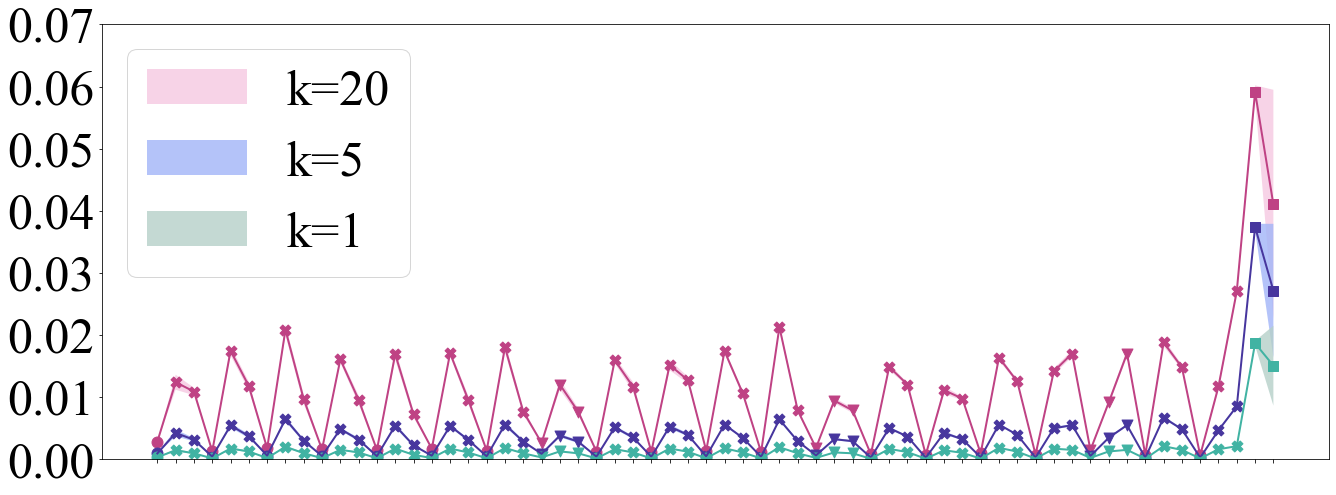

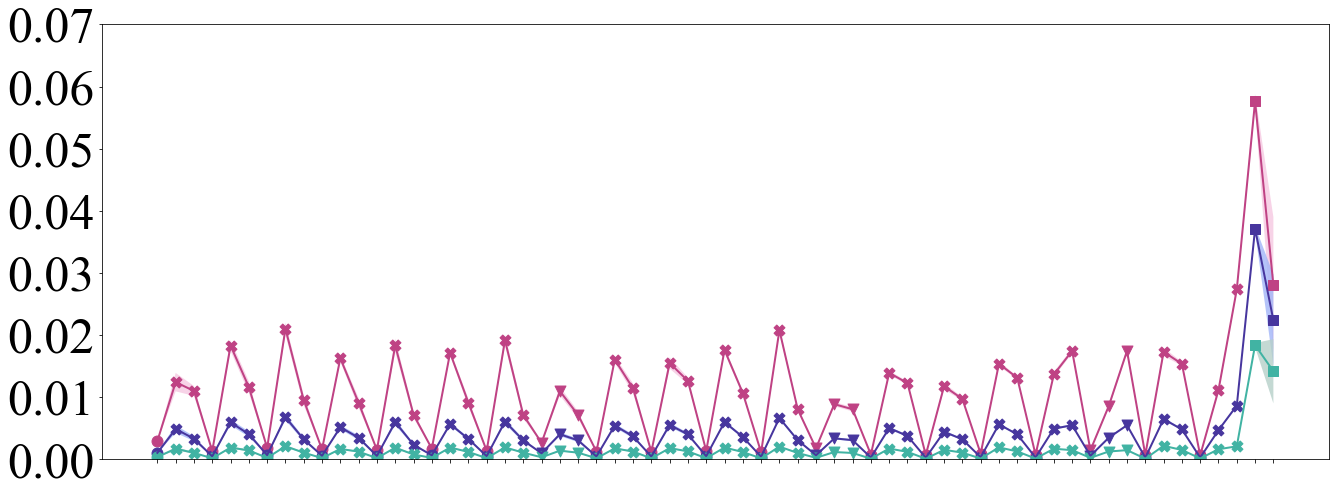

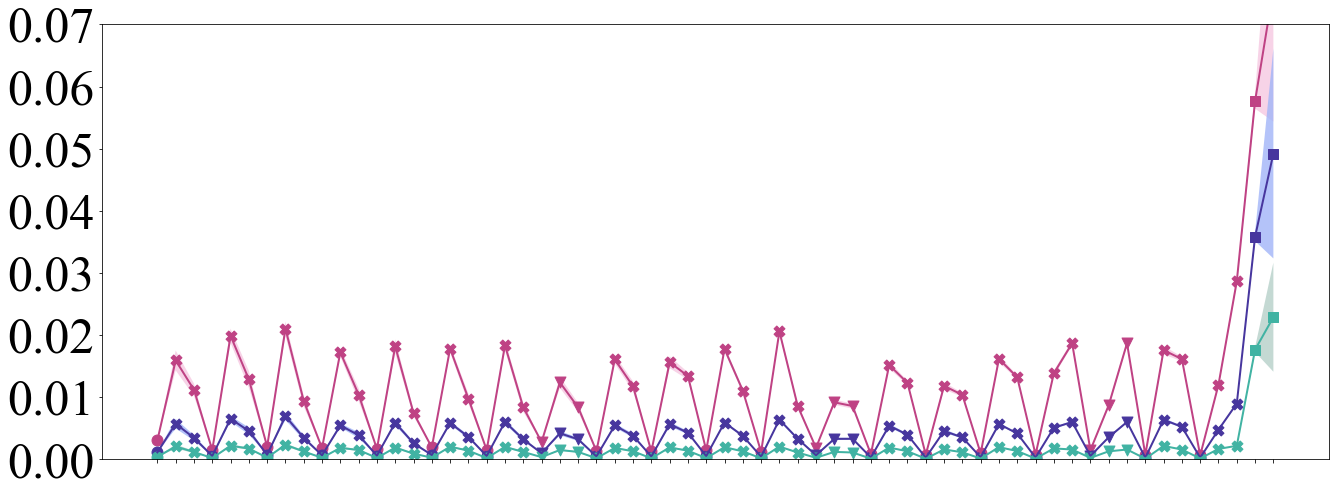

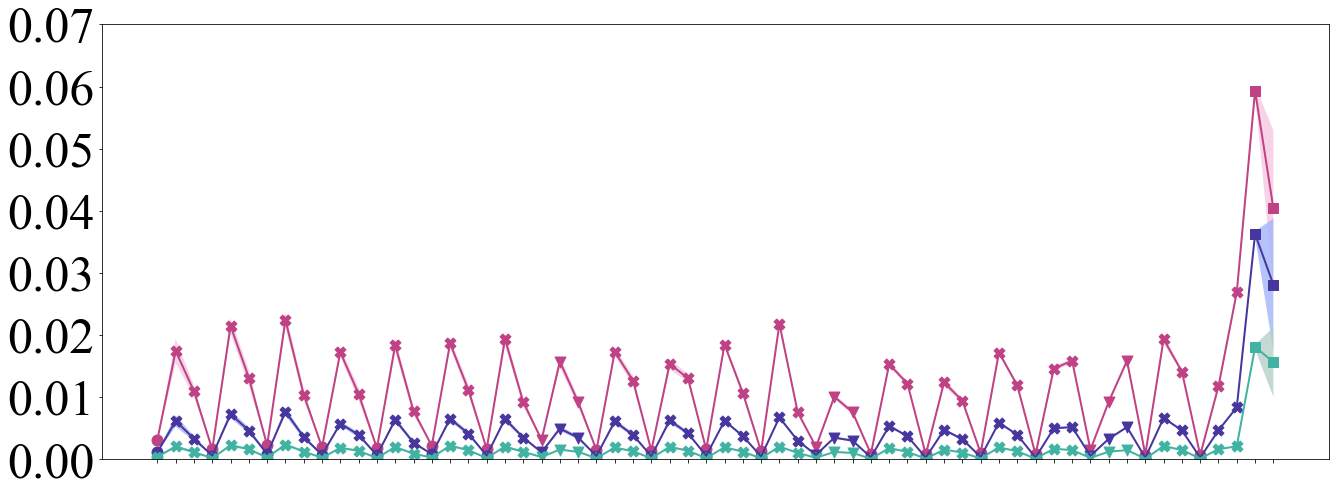

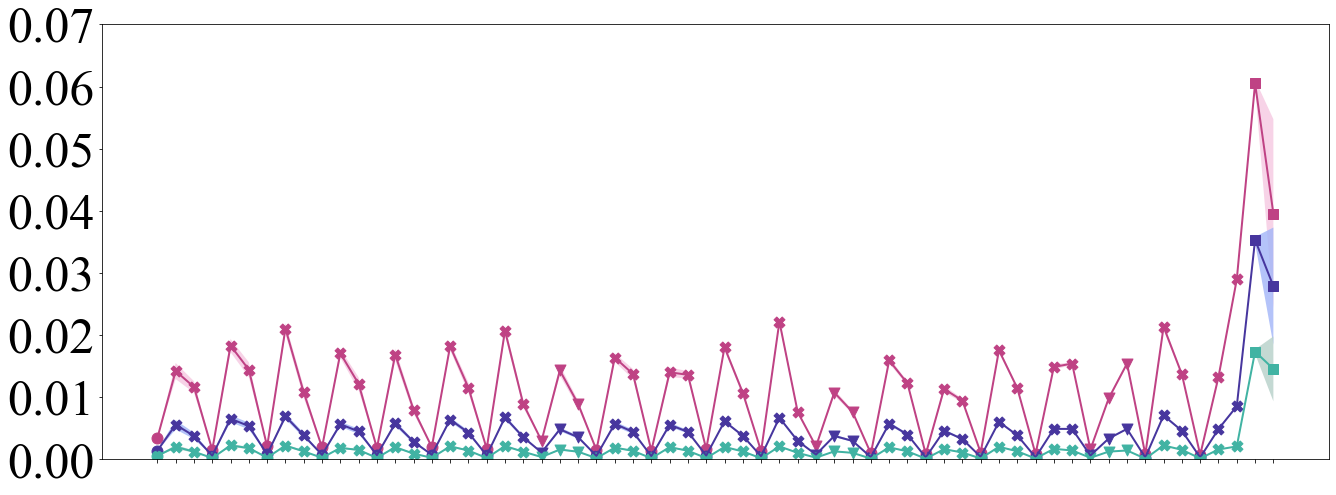

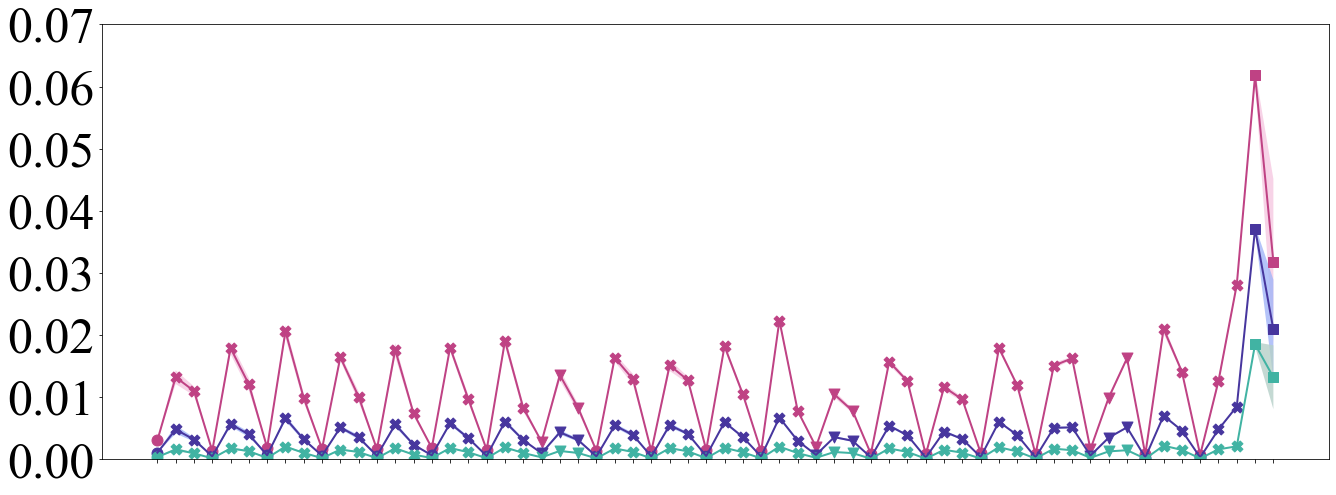

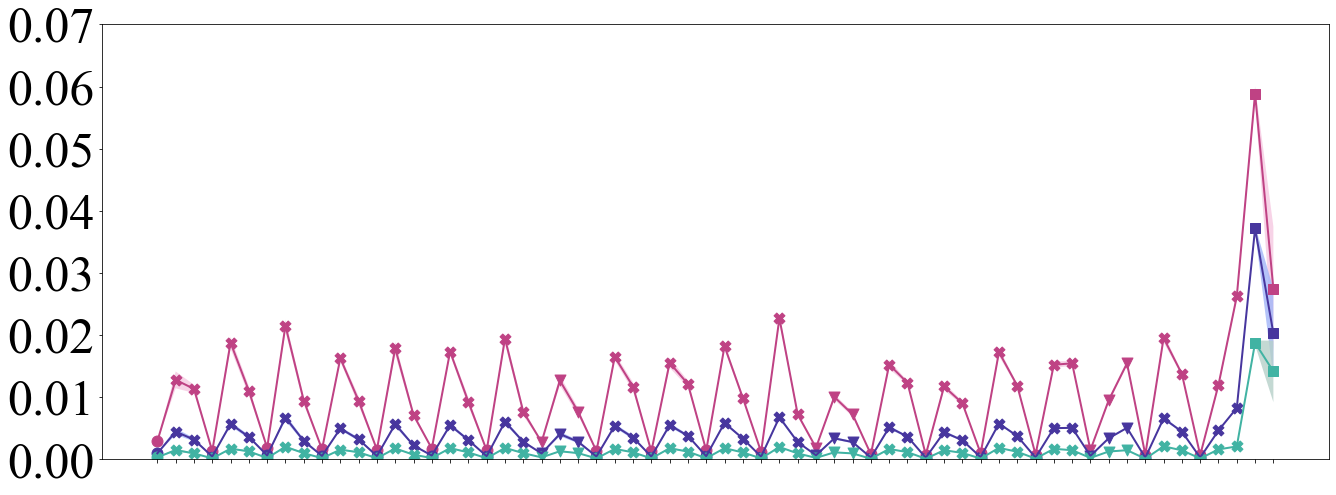

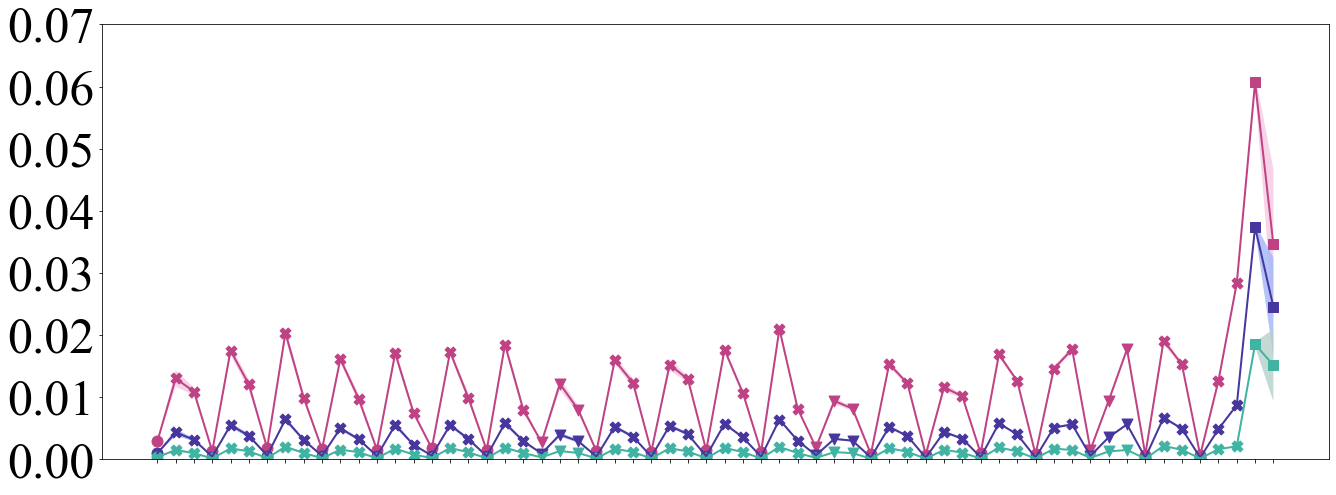

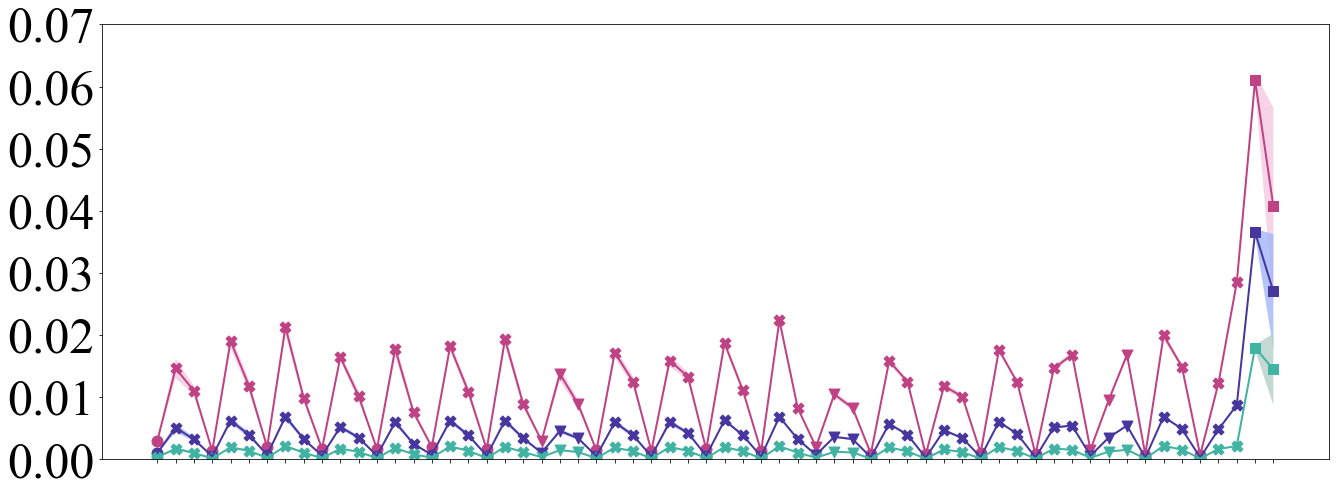

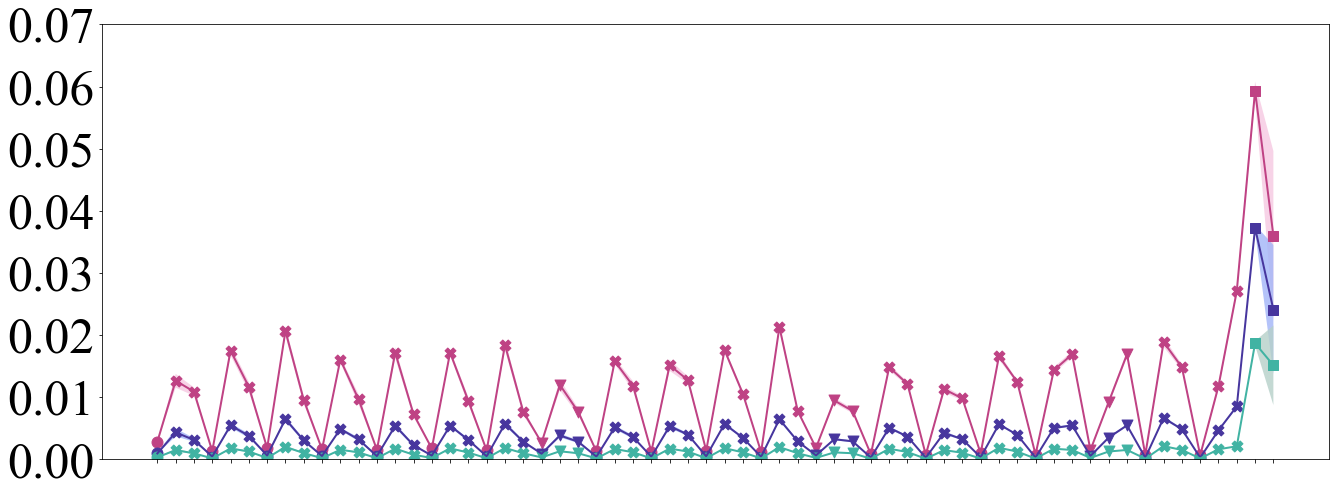

In [137]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format(data, shot)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    path5 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_005shot_full_default/layer_diff.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_020shot_full_default/layer_diff.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')

    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu20 = df20.mean()
    sigma20 = df20.std()

    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#f6c8e1', alpha=0.8, label='k=20')
    mu20.plot(linewidth = 2, color='#bf4284', label='' )
    
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#a1b5f8', alpha=0.8, label='k=5')
    mu5.plot(linewidth = 2, color='#47369e', label='')
    
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='#B6D0C9', alpha=0.8, label='k=1')
    mu1.plot(linewidth = 2, color='#41B3A3', label='')
    
    for i in range(0,62,1):
        if 'conv' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='o', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='o', label='', linestyle="-", s = 120)
        elif 'bn' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='X', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='X', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='X', label='', linestyle="-", s = 120)
        elif 'downsample' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='v', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='v', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='v', label='', linestyle="-", s = 120)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='s', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='s', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='s', label='', linestyle="-", s = 120)

    plt.legend().set_visible(False)
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    
    plt.xticks(np.arange(0, 62, 1), ['']*62, size = 25)
    plt.ylim([0, 0.07])
    plt.yticks(size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/tiered/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [158]:
df1.columns

Index(['backbone.trunk.0.weight', 'backbone.trunk.1.weight',
       'backbone.trunk.1.bias', 'backbone.trunk.4.C1.weight',
       'backbone.trunk.4.BN1.weight', 'backbone.trunk.4.BN1.bias',
       'backbone.trunk.4.C2.weight', 'backbone.trunk.4.BN2.weight',
       'backbone.trunk.4.BN2.bias', 'backbone.trunk.5.C1.weight',
       'backbone.trunk.5.BN1.weight', 'backbone.trunk.5.BN1.bias',
       'backbone.trunk.5.C2.weight', 'backbone.trunk.5.BN2.weight',
       'backbone.trunk.5.BN2.bias', 'backbone.trunk.5.shortcut.weight',
       'backbone.trunk.5.BNshortcut.weight',
       'backbone.trunk.5.BNshortcut.bias', 'backbone.trunk.6.C1.weight',
       'backbone.trunk.6.BN1.weight', 'backbone.trunk.6.BN1.bias',
       'backbone.trunk.6.C2.weight', 'backbone.trunk.6.BN2.weight',
       'backbone.trunk.6.BN2.bias', 'backbone.trunk.6.shortcut.weight',
       'backbone.trunk.6.BNshortcut.weight',
       'backbone.trunk.6.BNshortcut.bias', 'backbone.trunk.7.C1.weight',
       'backbone.trunk.7.B

In [156]:
lst = list(df1.columns)
for i in range(0,38,1):
    if 'conv' in df1.columns[i]:
        lst[i] = 'o'
    elif 'BN' in df1.columns[i]:
        lst[i] = 'x'
    elif 'shortcut' in df1.columns[i]:
        lst[i] = 'v'
    elif 'classifier' in df1.columns[i]:
        lst[i] = '-'

In [157]:
lst

['backbone.trunk.0.weight',
 'backbone.trunk.1.weight',
 'backbone.trunk.1.bias',
 'backbone.trunk.4.C1.weight',
 'x',
 'x',
 'backbone.trunk.4.C2.weight',
 'x',
 'x',
 'backbone.trunk.5.C1.weight',
 'x',
 'x',
 'backbone.trunk.5.C2.weight',
 'x',
 'x',
 'v',
 'x',
 'x',
 'backbone.trunk.6.C1.weight',
 'x',
 'x',
 'backbone.trunk.6.C2.weight',
 'x',
 'x',
 'v',
 'x',
 'x',
 'backbone.trunk.7.C1.weight',
 'x',
 'x',
 'backbone.trunk.7.C2.weight',
 'x',
 'x',
 'v',
 'x',
 'x',
 '-',
 '-']

IndexError: index 38 is out of bounds for axis 0 with size 38

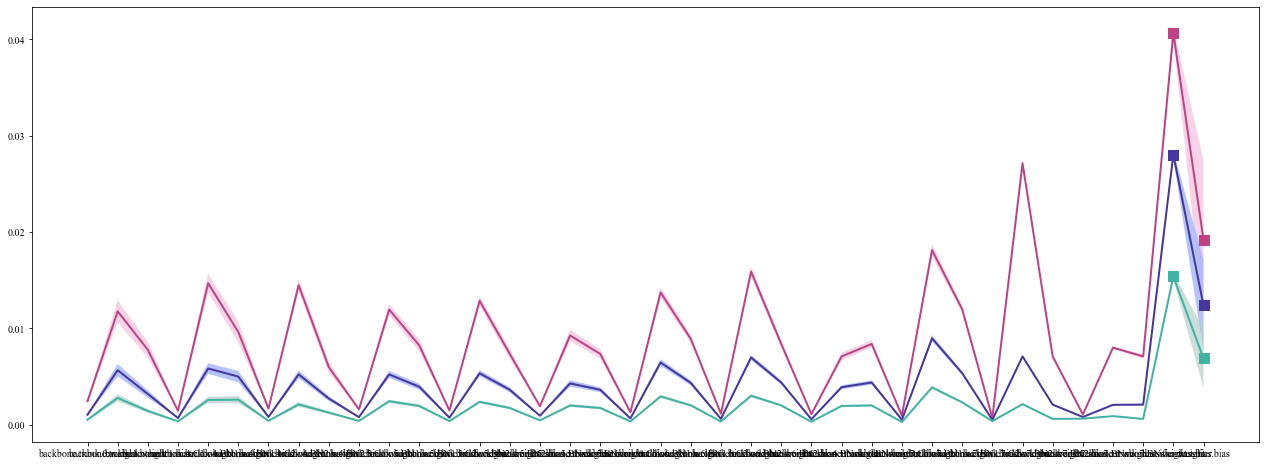

In [140]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format(data, shot)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    column_list = [''] * len(df1.columns)
    path5 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/layer_diff.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/layer_diff.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')


    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu20 = df20.mean()
    sigma20 = df20.std()
    
    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#f6c8e1', alpha=0.8, label='k=20')
    mu20.plot(linewidth = 2, color='#bf4284', label='', style=layer_marker )
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#a1b5f8', alpha=0.8, label='k=5')
    mu5.plot(linewidth = 2, color='#47369e', label='', style=layer_marker )
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='#B6D0C9', alpha=0.7, label='k=1')
    mu1.plot(linewidth = 2, color='#41B3A3', label='', style=layer_marker )
    plt.legend().set_visible(False)
    
    for i in range(0,62,1):
        if 'conv' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='o', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='o', label='', linestyle="-", s = 120)
        elif 'bn' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='X', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='X', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='X', label='', linestyle="-", s = 120)
        elif 'downsample' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='v', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='v', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='v', label='', linestyle="-", s = 120)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='s', label='', linestyle="-", s = 120)
            plt.scatter(i, mu5[i], color="#47369e", marker='s', label='', linestyle="-", s = 120)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='s', label='', linestyle="-", s = 120)

    
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    
    plt.xticks(np.arange(0, 62, 1), column_list, size = 25)
    plt.ylim([0, 0.07])
    plt.yticks(size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/mini/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [100]:
layer_marker

['o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'v-',
 'v-',
 'v-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'v-',
 'v-',
 'v-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'v-',
 'v-',
 'v-',
 'o-',
 'x-',
 'x-',
 'o-',
 'x-',
 'x-',
 'd-',
 'd-']